In [1]:
# Generate ratio plot: inter-TAD non-EPIs vs inter-TAD EPIs
# Author: Joshua Price
# Started: Nov 20, 2018
# Last Edited: Nov 23, 2018
# Runtime: ~20 min on alineos

import sys
sys.path.insert(0, r'/home/josh/mlep')
from mylib.funcs import mm9to10

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


# Define directory and file names
epDir = '/data2/josh/ep/'

enh_mm9_raw = 'focs_enhancers_mm9_2.csv'
enh_mm9_cleaned = 'focs_enhancers_mm9_2_cleaned.bed'
enh_mm10 = 'focs_enhancers_mm10_2.bed'

prom_mm9_raw = 'focs_promoters_mm9_2_dirty.csv'
# prom_mm9_raw = 'focs_promoters_mm9_2.csv'
# removeQuotes(epDir+'focs_promoters_mm9_2_dirty.csv',prom_mm9_raw)

# with open(epDir+prom_mm9_dirty, 'r') as f, open(epDir+prom_mm9_raw, 'w') as fo:
#     for line in f:
#        fo.write(line.replace('"', '').replace("'", ""))


prom_mm9_cleaned = 'focs_promoters_mm9_2_cleaned.bed'
prom_mm10 = 'focs_promoters_mm10_2.bed'

In [2]:
# Import focs enhancers dataset
enh9_raw = pd.read_csv(epDir+enh_mm9_raw,sep=',')
enh9_raw = enh9_raw.reset_index()

# Clean enhancers df
enh9 = enh9_raw[['level_1','level_2','level_3','level_4',]]
enh9.columns = ['chr','start','end','size']
enh9.to_csv(epDir+enh_mm9_cleaned,sep='\t',header=False,index=False)

# Liftover enh to mm10
mm9to10(epDir, enh_mm9_cleaned, enh_mm10)

In [3]:
# Import focs enhancers dataset
prom9 = pd.read_csv(epDir+prom_mm9_raw,sep=',',usecols=[1,2,3,4])
prom9.head()

,seqnames,start,end,width
0,chr1,3661753,3661814,62
1,chr1,3661852,3661889,38
2,chr1,4350319,4350327,9
3,chr1,4350338,4350393,56
4,chr1,4399305,4399321,17


In [5]:
# Clean enhancers df
prom9.columns = ['chr','start','end','size']
prom9.to_csv(epDir+prom_mm9_cleaned,sep='\t',header=False,index=False)

# Liftover enh to mm10
mm9to10(epDir, prom_mm9_cleaned, prom_mm10)

NameError: name 'prom9' is not defined

In [3]:
# Read in mm10 proms
prom = pd.read_csv(epDir+prom_mm10,sep='\t',header=None)
prom.columns = ['chr','start','end','size']

# Read in mm10 enhancers
enh = pd.read_csv(epDir+enh_mm10,sep='\t',header=None)
enh.columns = ['chr','start','end','size']

In [4]:
prom1 = prom[prom['chr'] == 'chr1']
enh1 =  enh[enh['chr'] == 'chr1']

In [5]:
enh1.size

11928

In [7]:
# Import df of strong pixels
pix = pd.read_csv('/data2/josh/contacts/all_strong5_pixels.csv',sep=',')

In [8]:
# pix['start1'] = pix['bin1_id'].multiply(200)
pix['start1'] = pix['bin1_id'] * 200
pix['start2'] = pix['bin2_id'] * 200
pix.tail(20)

,Unnamed: 0,bin1_id,bin2_id,count,start1,start2
350305,823631897,13622902,13623021,5,2724580400,2724604200
350306,823631959,13622916,13622947,8,2724583200,2724589400
350307,823631979,13622918,13622960,6,2724583600,2724592000
350308,823631987,13622919,13622960,5,2724583800,2724592000
350309,823631997,13622920,13622959,7,2724584000,2724591800
350310,823631998,13622920,13622960,5,2724584000,2724592000
350311,823632013,13622931,13622960,5,2724586200,2724592000
350312,823632050,13622947,13623021,5,2724589400,2724604200
350313,823632112,13622961,13622991,5,2724592200,2724598200
350314,823632120,13622963,13622991,13,2724592600,2724598200


(10, 50)

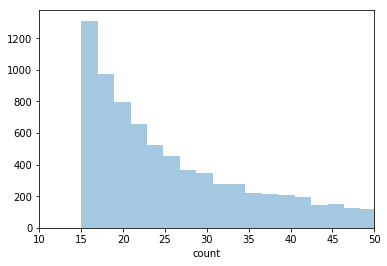

In [170]:
sns.distplot(pix['count'],bins=3000,kde=False)
plt.xlim([10,50])

In [9]:
# For now, only use chr 1. Won't be too hard to add chr labels, but not going to for now
pix1 = pix[pix['start1'] < 195471971]

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


288820

In [25]:
# Redefine pix1 for now
# pix1 = pd.read_csv('/data2/josh/contacts/all_strong_contacts1_lifted.bed',sep='\t',header=None)
# pix1.columns = ['chr','start1','start2','count']
# pix1.head()

In [10]:
# Add enhancer labels

chrA = 'chr1' # for now

counter = 0

for idx, row in pix1.iterrows():
    start = row['start1']
    end = row['start1'] + 200
    
    enhMatch = enh1[((enh1['chr'] == chrA) & ((enh1['start'] < start) & (enh1['end'] > start)) | ((enh1['start'] < end) & (enh1['end'] > end)) | ((enh1['start'] > start) & (enh1['end'] < end)))]
    if not enhMatch.empty:
        pix1.loc[idx,'ep1'] = 'E'
        counter += 1
    if ((idx % 100 == 0) & (idx > 0)):
        print(float(counter)/idx)

/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0.03
0.05
0.03333333333333333
0.025
0.02
0.018333333333333333
0.017142857142857144
0.015
0.013333333333333334
0.013
0.011818181818181818
0.014166666666666666
0.01769230769230769
0.02
0.023333333333333334
0.021875
0.020588235294117647
0.02
0.018947368421052633
0.0185
0.017619047619047618
0.022272727272727274
0.028695652173913042
0.0275
0.0272
0.028076923076923076
0.027407407407407408
0.026785714285714284
0.02620689655172414
0.025333333333333333
0.025483870967741934
0.0275
0.027575757575757576
0.027647058823529413
0.026857142857142857
0.02638888888888889
0.026216216216216216
0.025526315789473685
0.025897435897435896
0.02575
0.026097560975609755
0.02619047619047619
0.025813953488372093
0.025227272727272727
0.025111111111111112
0.025434782608695652
0.024893617021276595
0.024791666666666667
0.02489795918367347
0.0264
0.02823529411764706
0.027884615384615386
0.027358490566037737
0.028888888888888888
0.028363636363636365
0.027857142857142858
0.028070175438596492
0.027586206896551724
0.0271186

In [40]:
pix1[pix1['ep1']=='E'].shape[0]

1475

In [17]:
# Add promoter labels

chrA = 'chr1' # for now

counter = 0
promContacts = pd.DataFrame(columns=['chr','start','end','size'])

for idx, row in pix1.iterrows():
    start = row['start1']
    end = row['start1'] + 200
    
    promMatch = prom1[((prom1['chr'] == chrA) & ((prom1['start'] < start) & (prom1['end'] > start)) | ((prom1['start'] < end) & (prom1['end'] > end)) | ((prom1['start'] > start) & (prom1['end'] < end)))]
    if not promMatch.empty:
        pix1.loc[idx,'ep1'] = 'P'
        counter += 1
    if ((idx % 100 == 0) & (idx > 0)):
        print(float(counter)/idx)

/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0.04
0.025
0.03333333333333333
0.025
0.034
0.03666666666666667
0.03428571428571429
0.0475
0.04666666666666667
0.05
0.04818181818181818
0.045
0.04230769230769231
0.04357142857142857
0.04533333333333334
0.0425
0.041176470588235294
0.04
0.037894736842105266
0.042
0.047142857142857146
0.045
0.043043478260869565
0.042083333333333334
0.0424
0.04115384615384615
0.03962962962962963
0.03892857142857143
0.03793103448275862
0.03666666666666667
0.037096774193548385
0.036875
0.03787878787878788
0.03852941176470588
0.03942857142857143
0.041944444444444444
0.044054054054054055
0.04421052631578947
0.043076923076923075
0.043
0.042926829268292686
0.04238095238095238
0.04255813953488372
0.04181818181818182
0.04111111111111111
0.04021739130434782
0.039361702127659576
0.03854166666666667
0.03775510204081633
0.037
0.03627450980392157
0.035576923076923075
0.03490566037735849
0.03425925925925926
0.035454545454545454
0.03517857142857143
0.035964912280701755
0.035517241379310345
0.03694915254237288
0.0363333333

In [18]:
# Add promoter and enhancer labels for left

pix1['ep2'] = ''
chrA = 'chr1' # for now
counter = 0

for idx, row in pix1.iterrows():
    start = row['start2']
    end = row['start2'] + 200
    
    enhMatch = enh1[((enh1['chr'] == chrA) & ((enh1['start'] < start) & (enh1['end'] > start)) | ((enh1['start'] < end) & (enh1['end'] > end)) | ((enh1['start'] > start) & (enh1['end'] < end)))]
    promMatch = prom1[((prom1['chr'] == chrA) & ((prom1['start'] < start) & (prom1['end'] > start)) | ((prom1['start'] < end) & (prom1['end'] > end)) | ((prom1['start'] > start) & (prom1['end'] < end)))]
    
    if not enhMatch.empty:
        pix1.loc[idx,'ep2'] = 'E'
        counter += 1
        
    if not promMatch.empty:
        pix1.loc[idx,'ep2'] = 'P'
        counter += 1
    
    if ((idx % 1000 == 0) & (idx > 0)):
        print(float(counter)/idx)

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0.04
0.039
0.05333333333333334
0.05975
0.059
0.06716666666666667
0.07214285714285715
0.0785
0.07511111111111111
0.0756
0.08227272727272728
0.08091666666666666
0.07484615384615384
0.07378571428571429
0.07146666666666666
0.0689375
0.06752941176470588
0.0656111111111111
0.06431578947368422
0.0625
0.06166666666666667
0.06172727272727273
0.06282608695652174
0.06154166666666667
0.06092
0.06357692307692307
0.06322222222222222
0.06403571428571428
0.06558620689655173
0.06653333333333333
0.06725806451612903
0.0675
0.0679090909090909
0.06835294117647059
0.06885714285714285
0.06877777777777777
0.06932432432432432
0.06876315789473685
0.06794871794871794
0.06815
0.06807317073170732


In [46]:
# Import TADs
tads = pd.read_csv('/data2/josh/tads/TAD_mm10.csv', delimiter='\t')
tads = tads[tads['chrom'] == 'chr1']
tads.head()

,chrom,start,end
1851,chr1,21395000,22290000
1852,chr1,3195000,4360000
1853,chr1,13770000,14730000
1854,chr1,177840000,178310000
1855,chr1,137350000,138045000


In [49]:
# Label left side of contacts with TADs
pix1_tad_list1 = [None] * pix1.shape[0]
for idx, row in pix1.iterrows():
    start = row['start1']
    end = row['start1'] + 200
    tad_matches = tads[(tads['chrom'] == 'chr1') & ((tads['start'] < start) & (tads['end'] > end))]
    if tad_matches.empty:
        pix1_tad_list1[idx] = -1
    else:
        pix1_tad_list1[idx] = tad_matches.index[0]

In [50]:
pix1['tad1'] = pix1_tad_list1

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
# Label left side of contacts with TADs
pix1_tad_list2 = [None] * pix1.shape[0]
for idx, row in pix1.iterrows():
    start = row['start2']
    end = row['start2'] + 200
    tad_matches = tads[(tads['chrom'] == 'chr1') & ((tads['start'] < start) & (tads['end'] > end))]
    if tad_matches.empty:
        pix1_tad_list2[idx] = -1
    else:
        pix1_tad_list2[idx] = tad_matches.index[0]

pix1['tad2'] = pix1_tad_list2

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [57]:
# define helper function tad_status
def tad_status(p_tad, e_tad):
    if (p_tad == e_tad):
        return 'Intra-TAD'
    else:
        return 'Inter-TAD'
    
    # Create list for EP_status the put it into the df 
tad_status_list = [tad_status(row['tad1'], row['tad2']) for idx, row in pix1.iterrows()]
pix1['tad_status'] = tad_status_list

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [67]:
# define helper function ep_status
def ep_status(left, right):
    if (((left == 'E') and (right == 'P')) or ((left == 'P') and (right == 'E'))):
        return 'EP'
    elif ((left == 'P') or (right == 'P')):
        return 'P'
    elif ((left == 'E') or (right == 'E')):
        return 'E'
    else:
        return 'N'

# Create list for EP_status the put it into the df 
ep_status_list = [ep_status(row['ep1'], row['ep2']) for idx, row in pix1.iterrows()]
pix1['ep_status'] = ep_status_list

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [86]:
pcontacts = pix1[(pix1['ep1']=='P') & (pix1['ep2']=='P')]
pcontacts

,Unnamed: 0,bin1_id,bin2_id,count,start1,start2,ep1,ep2,tad1,tad2,tad_status,ep_status
473,4602064,83284,83326,5,16656800,16665200,P,P,-1,-1,Intra-TAD,P
1944,11135746,182735,182790,6,36547000,36558000,P,P,2113,2113,Intra-TAD,P
1945,11136477,182736,182790,7,36547200,36558000,P,P,2113,2113,Intra-TAD,P
2387,11310031,183415,183457,5,36683000,36691400,P,P,-1,-1,Intra-TAD,P
2482,11388850,183809,183837,7,36761800,36767400,P,P,-1,-1,Intra-TAD,P
3030,13459360,197679,197886,5,39535800,39577200,P,P,-1,-1,Intra-TAD,P
3521,18816233,275137,275264,6,55027400,55052800,P,P,1933,1933,Intra-TAD,P
3526,18833087,275264,275439,8,55052800,55087800,P,P,1933,1933,Intra-TAD,P
3527,18833131,275264,275656,5,55052800,55131200,P,P,1933,1933,Intra-TAD,P
3612,19556990,284857,284892,5,56971400,56978400,P,P,-1,-1,Intra-TAD,P


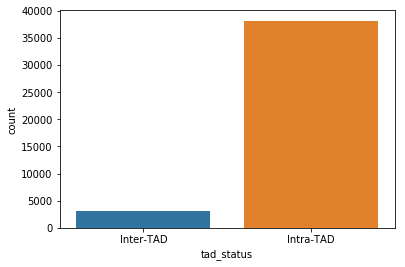

In [65]:
ax1 = sns.countplot(x="tad_status", data=pix1)

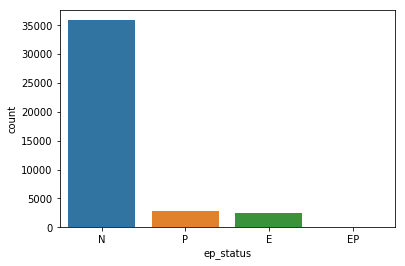

In [68]:
ax2 = sns.countplot(x="ep_status", data=pix1)

In [81]:
pix1.head()

,Unnamed: 0,bin1_id,bin2_id,count,start1,start2,ep1,ep2,tad1,tad2,tad_status,ep_status
0,704,15017,399915,5,3003400,79983000,,,-1,1876,Inter-TAD,N
1,185559,18361,18389,5,3672200,3677800,,,1852,1852,Intra-TAD,N
2,289237,20280,20307,5,4056000,4061400,,,1852,1852,Intra-TAD,N
3,337183,21282,8153982,6,4256400,1630796400,,,1852,-1,Inter-TAD,N
4,337527,21287,1800885,5,4257400,360177000,,,1852,-1,Inter-TAD,N
